# INFSCI0510 Data Analysis, Department of Computer Science, SCUPI
# Assignment 3: Binary Classification with SVM

In this assignment, you will implement a SVM for binary classification. 

## Dataset
We will use some toy data from _sklearn.datasets.make_moons_

## <font color='red'>Exercise 1: Data Generation and Transformation (15 pts)</font>

Please complete the following tasks:

- Using _sklearn.datasets.make_moons_ to generate 500 samples with _noise_ level 0.25, and _random_state_ 49. (5 marks)
- Transform binary labels from the form {0, 1} to {-1, +1}. (5 marks)
- Create train-test sets with the ratio 1:1, with the _random_state_ as 42. (5 marks)

**Note:** All the hyperparameters aformentioned here are for reproduction purposes, please follow the instructions to set them accordingly, fail to do so will lead to marks deducted.

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Data generation (5 marks)
X, y = make_moons(n_samples = 500, noise = 0.25, random_state = 49)

# Label transformation (5 marks)
y = y * 2 - 1

# Train-test split (5 marks)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)


## Evaluation Metrics

#### Confusion Matrix
A confusion matrix can be used to evaluate the performance of a classification model, especially in binary classification. It shows the comparison between the actual and predicted labels. The confusion matrix includes four values:

- **True Positive (TP)**: The number of samples correctly predicted as positive.
- **True Negative (TN)**: The number of samples correctly predicted as negative.
- **False Positive (FP)**: The number of samples incorrectly predicted as positive.
- **False Negative (FN)**: The number of samples incorrectly predicted as negative.

Example of a confusion matrix:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | TP                 | FN                 |
| **Actual Negative** | FP                 | TN                 |

#### Precision
Besides confusion matrix, the Precision measures the proportion of positive predictions that are actually positive, calculated as follows:

$Precision = \frac{TP}{TP + FP}$,

where $TP$ = No. of True Positives (model predicts positive and true value is positive), $FP$ = No. of False Positives (model predicts positive and true value is negative).

#### Recall
Also, the Recall measures the proportion of actual positive samples that are correctly predicted as positive by the model, calculated as follows:

$Recall = \frac{TP}{TP + FN}$,

where $FN$ = No. of False Negatives (model predicts negative and true value is positive).

## <font color='red'>Exercise 2: SVM Train and Test (50 pts)</font>

SVM is a powerful model for classification. Specifically, it provides:

1. A hyperparameter C for margin maximization and soft margin.
2. Implementations with different kernels (e.g., Linear, Polynomial, or RBF kernels) for non-linear solution in the sample space.

In this section, you will implement a SVM classifier (SVC) for train-test on the generated Moon dataset, please complete the following tasks:

- Train a SVC and test it with the Moon dataset. You need to run the SVC with three kernels, i.e., Linear, Polynomial and RBF kernels, respectively. (5 marks)
- Tune each SVC with hyperparameter searching, and report the best hyperparameters found. (15 marks)

Once you've selected the best hyperparameters for each kernel, you will need to report the following informations from your SVC:
- Confusion matrix, Recall, and Precision. (15 marks)
- An illustration of the decision boundaries in 2D, using the training data, including: all the decision boundaries; colored areas vary in decisions; colored data points vary in ground truth labels; indication of support vectors; legends and axis labels. (15 marks)

**Note:** Scikit-learn library is allowed, such as _sklearn.svm.SVC_ </br>
**Note:** For hyperparameter searching, you can use general grid search or other effective optimization techniques. </br>
**Note:** Cross-validation can be integreted with hyperparameter searching, see _sklearn.model_selection.RandomizedSearchCV_, please set _n_iter_ with 50, _cv_ with 5 and _random_state_ as 40 for reproduction purposes. </br>
**Note:** You can also use Scikit-learn libraries for evaluation metrics.

D:\LSC\Apps\Python\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LSC\Apps\Python\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LSC\Apps\Python\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=50. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Linear Kernel: {'C': 1}
Best Parameters for Polynomial Kernel: {'degree': 3, 'C': 10}
Best Parameters for RBF Kernel: {'gamma': 1, 'C': 1}

Linear Kernel - Confusion Matrix:
 [[ 99  18]
 [ 22 111]]
Linear Kernel - Precision: 0.8604651162790697, Recall: 0.8345864661654135, Accuracy: 0.84

Polynomial Kernel - Confusion Matrix:
 [[ 99  18]
 [  6 127]]
Polynomial Kernel - Precision: 0.8758620689655172, Recall: 0.9548872180451128, Accuracy: 0.904

RBF Kernel - Confusion Matrix:
 [[107  10]
 [  6 127]]
RBF Kernel - Precision: 0.927007299270073, Recall: 0.9548872180451128, Accuracy: 0.936


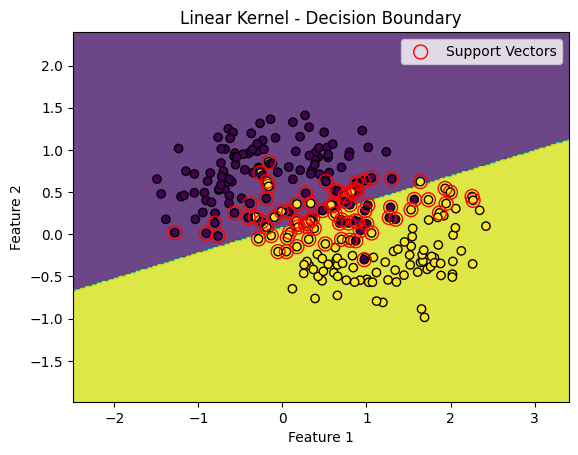

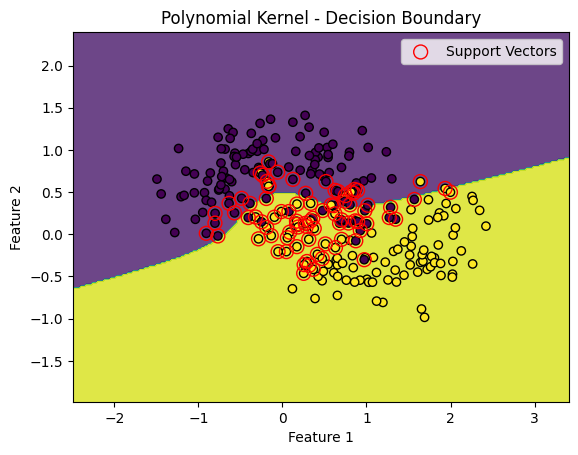

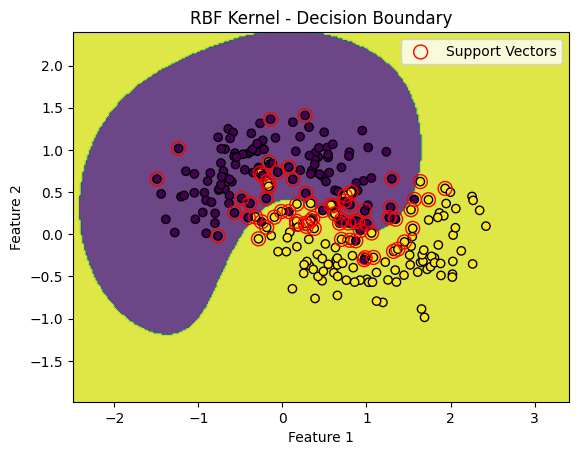

In [2]:
# SVC with Linear kernel, Polynomial kernel, RBF kernel (5 marks)

# Confusion matrix, recall, precision (15 marks)
# Decision illustration (15 marks)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

X, y = make_moons(n_samples=500, noise=0.25, random_state=49)
y = y * 2 - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

param_grid_linear = {'C': [0.1, 1, 10]}
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

random_state = 40

# Hyperparameter searching (15 marks)
svc_linear = SVC(kernel='linear')
grid_linear = RandomizedSearchCV(svc_linear, param_grid_linear, n_iter=50, cv=5, random_state=random_state)
grid_linear.fit(X_train, y_train)
best_params_linear = grid_linear.best_params_

svc_poly = SVC(kernel='poly')
grid_poly = RandomizedSearchCV(svc_poly, param_grid_poly, n_iter=50, cv=5, random_state=random_state)
grid_poly.fit(X_train, y_train)
best_params_poly = grid_poly.best_params_

svc_rbf = SVC(kernel='rbf')
grid_rbf = RandomizedSearchCV(svc_rbf, param_grid_rbf, n_iter=50, cv=5, random_state=random_state)
grid_rbf.fit(X_train, y_train)
best_params_rbf = grid_rbf.best_params_

print(f"Best Parameters for Linear Kernel: {best_params_linear}")
print(f"Best Parameters for Polynomial Kernel: {best_params_poly}")
print(f"Best Parameters for RBF Kernel: {best_params_rbf}")

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    accuracy = accuracy_score(y_test, y_pred)
    return conf_matrix, precision, recall, accuracy

svc_linear_best = SVC(kernel='linear', **best_params_linear)
svc_linear_best.fit(X_train, y_train)
conf_matrix_linear, precision_linear, recall_linear, accuracy_linear = evaluate_model(svc_linear_best, X_test, y_test)

svc_poly_best = SVC(kernel='poly', **best_params_poly)
svc_poly_best.fit(X_train, y_train)
conf_matrix_poly, precision_poly, recall_poly, accuracy_poly = evaluate_model(svc_poly_best, X_test, y_test)

svc_rbf_best = SVC(kernel='rbf', **best_params_rbf)
svc_rbf_best.fit(X_train, y_train)
conf_matrix_rbf, precision_rbf, recall_rbf, accuracy_rbf = evaluate_model(svc_rbf_best, X_test, y_test)

print("\nLinear Kernel - Confusion Matrix:\n", conf_matrix_linear)
print(f"Linear Kernel - Precision: {precision_linear}, Recall: {recall_linear}, Accuracy: {accuracy_linear}")

print("\nPolynomial Kernel - Confusion Matrix:\n", conf_matrix_poly)
print(f"Polynomial Kernel - Precision: {precision_poly}, Recall: {recall_poly}, Accuracy: {accuracy_poly}")

print("\nRBF Kernel - Confusion Matrix:\n", conf_matrix_rbf)
print(f"RBF Kernel - Precision: {precision_rbf}, Recall: {recall_rbf}, Accuracy: {accuracy_rbf}")

def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                facecolors='none', edgecolors='r', s=100, label='Support Vectors')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_decision_boundary(svc_linear_best, X_train, y_train, "Linear Kernel - Decision Boundary")

plot_decision_boundary(svc_poly_best, X_train, y_train, "Polynomial Kernel - Decision Boundary")

plot_decision_boundary(svc_rbf_best, X_train, y_train, "RBF Kernel - Decision Boundary")

## <font color='red'>Exercise 3: Further Discussion (35 pts)</font>

In the end, based on the statistics (Confusion matrix, Recall, and Precision) and the decision plots of your SVCs, complete the following discussions:
- Compare the statistics and the training decision illustrations among all the three SVCs, what do you find? Can you explain your findings? (10 marks)
- The support vectors are the key to solve the optimization problem in SVM, could you take a look at your training decision plots and summarize which data points are regarded as support vectors? Why these points? (25 marks)

# Compare among all the SVCs, what do you find? Can you explain your findings? (10 marks)
Looking at precision, recall, and precision, I find that the RBF kernel is better than the polynomial kernel and better than the linear kernel.  
The reason for this result lies in the use cases of the three cores. In general, the decision boundary of the linear kernel is a straight line, which is only suitable for linearly separable data, and the moon dataset we generated is not strictly linearly separable, so the linear kernel performs poorly.  
The polynomial kernel is more flexible than the linear kernel and can fit more complex shapes with `degrees`, but it can overfit and its performance depends on the hyperparameters.  
RFB can fit highly nonlinear data sets, and RFB kernel performs best in most cases.


# Summarize from the decision plots and explain which data points are regarded as support vectors (25 marks)
The support vectors are the points closest to the decision boundary, which directly determine the position and orientation of the hyperplane.  
Looking at the image, you can see that all the points in the red circle are support vectors, and they are on either side of the decision boundary, and they are very close to the hyperplane.  
In particular, note that the support vectors appear circular in the image of the RBF kernel. This is because the hyperplane of the RBF kernel is a circle.  

## <font color='blue'>Submission</font>
Please submit the .ipynb file with your answer, and rename the file as _A3-[Section Number]-[Student ID]-[Your name]_. </br>
For example, _A3-01-2023141520000-Sophia.ipynb_